In [1]:
import networkx as nx
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import pydot
from networkx.drawing.nx_pydot import graphviz_layout

from utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
G, S = read_metis_graph("../data/bio/bio-nr-1-size-9.metis")

In [5]:
MAX_SIZE = 200

instances = list(map(read_metis_graph, Path("../data/bio").glob("*.metis")))
graphs = [G for (G, S) in instances if len(G) <= MAX_SIZE]

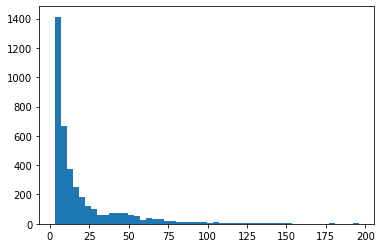

In [6]:
fig, ax = plt.subplots()
ax.hist([graph.order() for graph in graphs], bins=50)
plt.show()

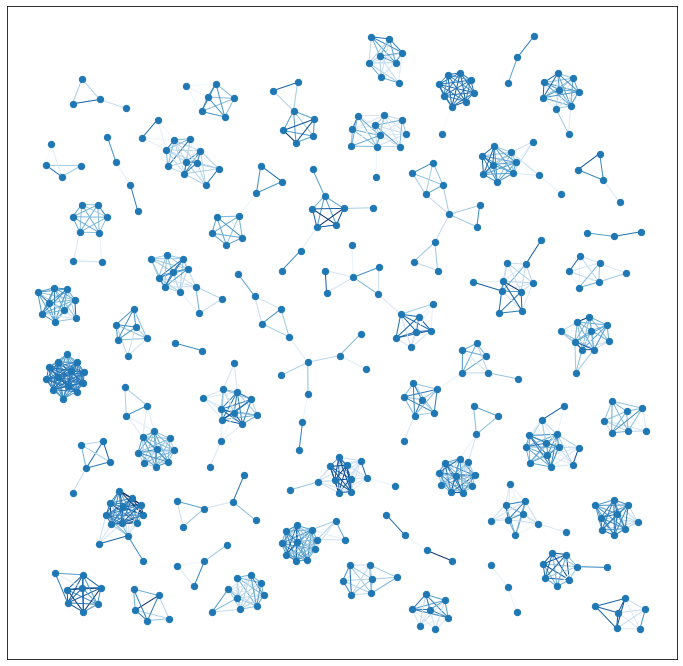

In [7]:
UU = nx.disjoint_union_all([G for G in graphs if len(G) < 15][:50])


fig, ax = plt.subplots(figsize=(12, 12))

# ‘dot’, ‘twopi’, ‘fdp’, ‘sfdp’, ‘circo’
pos = nx.nx_pydot.graphviz_layout(UU, prog="neato")

edge_color = [c for (u, v, c) in UU.edges.data('cost')]
edge_color = np.log1p(np.array(edge_color))

nx.draw_networkx_nodes(UU, pos, ax=ax, node_size=40)
nx.draw_networkx_edges(UU, pos, ax=ax, edge_color=edge_color, edge_cmap=plt.cm.Blues)

plt.show()

In [ ]:
# baumweite, complexity, durchmesser, dichte

In [ ]:
avg_clustering = [nx.average_clustering(G) for G in graphs]
number_of_nodes = [len(G) for G in graphs]
complexity = [G.number_of_edges() * G.number_of_nodes() for G in graphs]
density = [G.number_of_edges() / G.number_of_nodes()**2 for G in graphs]
diameter = [nx.diameter(G) if nx.is_connected(G) else 0 for G in graphs]
radius = [nx.radius(G) if nx.is_connected(G) else 0 for G in graphs]

In [ ]:

plt.scatter(number_of_nodes, diameter, alpha=0.7)
plt.show()

In [ ]:
plt.hist([nx.sigma(G) for G in graphs])
plt.show()